In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/COVID-19 Coronavirus.csv')
df.head(5)

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Confirmed Case,Total Deaths,Total Active Case,Total Active deathCase,Recovery Case,Mortality Rate,Infection Rate,Date
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,165761,4.313743,439.489354,7671.0
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,175029,1.275058,9534.880806,NaN
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,252944,2.587216,587.335075,NaN
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,-476694,0.382271,51656.535150,NaN
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,94432,1.915438,286.239375,NaN


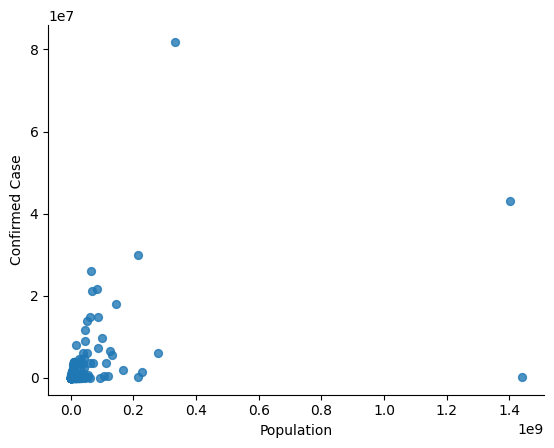

In [3]:
# @title Population vs Confirmed Case

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Population', y='Confirmed Case', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
print(df.info())
print(df.describe())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Confirmed Case           225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7    Total Active Case       225 non-null    int64  
 8   Total Active deathCase   225 non-null    int64  
 9   Recovery Case            225 non-null    int64  
 10  Mortality Rate           225 non-null    float64
 11  Infection Rate           225 non-null    float64
 12  Date                     1 non-null      float64
dtypes: float64(3), int64(6), object(4)
memory usage: 23.0+ KB
None
         Populati

In [5]:
del df['Date']
print(df)

               Country                Other names ISO 3166-1 alpha-3 CODE  \
0          Afghanistan                Afghanistan                     AFG   
1              Albania                    Albania                     ALB   
2              Algeria                    Algeria                     DZA   
3              Andorra                    Andorra                     AND   
4               Angola                     Angola                     AGO   
..                 ...                        ...                     ...   
220  Wallis and Futuna  Wallis and Futuna Islands                     WLF   
221     Western Sahara             Western Sahara                   ESHÂ    
222              Yemen                      Yemen                     YEM   
223             Zambia                     Zambia                     ZMB   
224           Zimbabwe                   Zimbabwe                     ZWE   

     Population Continent  Confirmed Case  Total Deaths   Total Active Case

In [6]:
print(df.isnull().sum())


Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Confirmed Case             0
Total Deaths               0
 Total Active Case         0
Total Active deathCase     0
Recovery Case              0
Mortality Rate             0
Infection Rate             0
dtype: int64


In [7]:
df.fillna(0, inplace=True)  # Replace NaN with 0


In [9]:
print(df.columns)



Index(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population',
       'Continent', 'Confirmed Case', 'Total Deaths', ' Total Active Case',
       'Total Active deathCase', 'Recovery Case', 'Mortality Rate',
       'Infection Rate'],
      dtype='object')


In [8]:
top_countries = df.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False).head(10)
print(top_countries)


Country
USA          1008222
Brazil        660269
India         521388
Russia        369708
Mexico        323212
Peru          212328
UK            165570
Italy         159784
Indonesia     155288
France        142506
Name: Total Deaths, dtype: int64


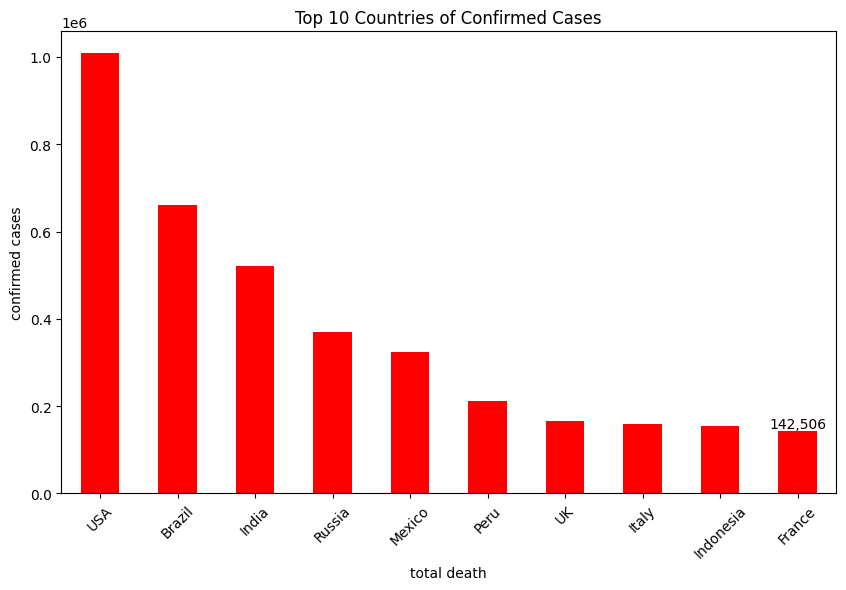

In [10]:
countries = ['USA','Brazil' 'India', 'Russia', 'Mexico', 'peru', 'UK' 'intaly', 'Indonesia', 'France']
cases = [1008222, 660269, 521388, 369708, 323212, 212328, 165570, 159784, 155288,142506 ]
plt.figure(figsize=(10, 6))
bars= top_countries.plot(kind='bar', color='red')
for bar in bars.patches:
    height = bar.get_height()
plt.text(bar.get_x() + bar.get_width() / 2, height,
         # Position of text
f'{height:,}',  # Text (formatted with commas)
ha='center', va='bottom', fontsize=10, color='black')
plt.xticks(rotation=45)
plt.title('Top 10 Countries of Confirmed Cases')
plt.ylabel('confirmed cases')
plt.xlabel('total death')
plt.show()



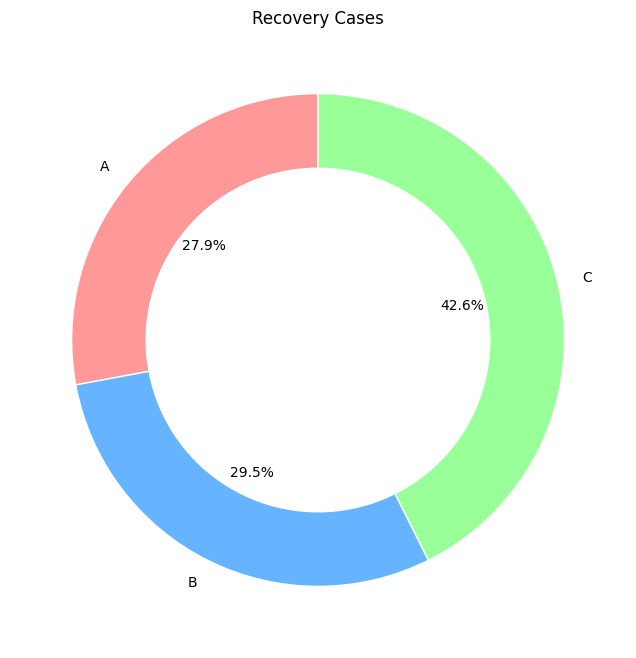

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for Recovery_cases (replace with actual data)
Recovery_cases = pd.Series([165761, 175029, 252944], index=['A', 'B', 'C'])

# Create figure
plt.figure(figsize=(8, 8))

# Plot donut chart
wedges, texts, autotexts = plt.pie(Recovery_cases, labels=Recovery_cases.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'], startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

# Draw a circle at the center to create the 'donut' effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)

# Title
plt.title('Recovery Cases')

# Display the chart
plt.show()



In [12]:

# Sample DataFrame with extra spaces in column names
data = {'  Date ': ['2021-03-01', '2021-03-02'],
        ' Country ': ['India', 'USA'],
        ' Confirmed ': [1000, 2000],
        ' Deaths': [50, 70]}

df = pd.DataFrame(data)

print("Before stripping:")
print(df.columns)

# Remove whitespace from column names
df.columns = df.columns.str.strip()

print("\nAfter stripping:")
print(df.columns)


Before stripping:
Index(['  Date ', ' Country ', ' Confirmed ', ' Deaths'], dtype='object')

After stripping:
Index(['Date', 'Country', 'Confirmed', 'Deaths'], dtype='object')


In [13]:
print((df.isnull().sum() / len(df)) * 100)



Date         0.0
Country      0.0
Confirmed    0.0
Deaths       0.0
dtype: float64


In [ ]:
df.columns = df.columns.str.strip()  # Remove whitespace
print(df.columns)


Index(['Date', 'Country', 'Confirmed', 'Deaths'], dtype='object')


In [14]:
print(df.isnull().sum()[df.isnull().sum() > 0])


Series([], dtype: int64)


In [15]:
print(df.head())


         Date Country  Confirmed  Deaths
0  2021-03-01   India       1000      50
1  2021-03-02     USA       2000      70


In [16]:
import difflib

search_term = 'Case'
print(f"Closest match to '{search_term}': {difflib.get_close_matches(search_term, df.columns)}")


Closest match to 'Case': []


In [17]:
# Check for missing values
print(df.isnull().sum())

# Drop rows or columns with missing values (if applicable)
df = df.dropna()

# Alternatively, fill missing values with a specific value
df = df.fillna(value={'column_name': 'value_to_fill'})

# Display the cleaned data
print(df.head())


Date         0
Country      0
Confirmed    0
Deaths       0
dtype: int64
         Date Country  Confirmed  Deaths
0  2021-03-01   India       1000      50
1  2021-03-02     USA       2000      70


In [18]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '-')
print(df.columns)

Index(['Date', 'Country', 'Confirmed', 'Deaths'], dtype='object')


In [19]:
df.head(7)

,Date,Country,Confirmed,Deaths
0,2021-03-01,India,1000,50
1,2021-03-02,USA,2000,70


Load the data

In [20]:
india = pd.read_csv('/content/COVID-19 India Statewise Vaccine Data.csv')
india.head(5)

,State/UTs,Total Vaccination Doses,Dose1,Dose 2,Dose 1 15-18,Dose 2 15-18,Dose 1 12-14,Dose 2 12-14,Precaution 18-59,Population
0,Andaman And Nicobar,991264,313284,320383,19208,18860,15124,14042,236936,399001
1,Andhra Pradesh,110957430,40645695,43555744,2535344,2527613,1523375,1495445,12054868,91702478
2,Arunachal Pradesh,1924584,861396,748505,59100,44869,40852,28445,81191,1711947
3,Assam,50335778,22550941,20575569,1262520,972402,999552,602283,2108179,35998752
4,Bihar,157293015,62956601,59160917,6240650,5348480,4288630,3403195,12022637,128500364


 Understand the data

In [21]:
# Get basic information about the dataset
print(india.info())

# Check for missing values
print(india.isnull().sum())

# Summary statistics
print(india.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   State/UTs                36 non-null     object
 1   Total Vaccination Doses  36 non-null     int64 
 2   Dose1                    36 non-null     int64 
 3   Dose 2                   36 non-null     int64 
 4   Dose 1 15-18             36 non-null     int64 
 5   Dose 2 15-18             36 non-null     int64 
 6   Dose 1 12-14             36 non-null     int64 
 7   Dose 2 12-14             36 non-null     int64 
 8   Precaution 18-59         36 non-null     int64 
 9   Population               36 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 2.9+ KB
None
State/UTs                  0
Total Vaccination Doses    0
Dose1                      0
Dose 2                     0
Dose 1 15-18               0
Dose 2 15-18               0
Dose 1 12-14               0
Dos

 Data Cleaning

In [22]:
# Fill missing values with 0 (or use a strategy suitable for your data)
india.fillna(0, inplace=True)

# Remove duplicates if any
india.drop_duplicates(inplace=True)

# Check cleaned data
print(india.isnull().sum())


State/UTs                  0
Total Vaccination Doses    0
Dose1                      0
Dose 2                     0
Dose 1 15-18               0
Dose 2 15-18               0
Dose 1 12-14               0
Dose 2 12-14               0
Precaution 18-59           0
Population                 0
dtype: int64


Exploratory Data Analysis (EDA)

In [23]:
print(india.columns)


Index(['State/UTs', 'Total Vaccination Doses', 'Dose1', 'Dose 2',
       'Dose 1 15-18', 'Dose 2 15-18', 'Dose 1 12-14', 'Dose 2 12-14',
       'Precaution 18-59', 'Population'],
      dtype='object')


In [24]:
# Strip extra spaces and fix column names
india.columns = india.columns.str.strip()
print(india.columns)


Index(['State/UTs', 'Total Vaccination Doses', 'Dose1', 'Dose 2',
       'Dose 1 15-18', 'Dose 2 15-18', 'Dose 1 12-14', 'Dose 2 12-14',
       'Precaution 18-59', 'Population'],
      dtype='object')


In [25]:
for col in india.columns:
    print(f'Column name: "{col}"')


Column name: "State/UTs"
Column name: "Total Vaccination Doses"
Column name: "Dose1"
Column name: "Dose 2"
Column name: "Dose 1 15-18"
Column name: "Dose 2 15-18"
Column name: "Dose 1 12-14"
Column name: "Dose 2 12-14"
Column name: "Precaution 18-59"
Column name: "Population"


In [26]:
# Example: Rename columns to match your expected names
india.rename(columns={' state': 'State', ' total_doses_administered': 'Total Doses Administered'}, inplace=True)


Total vaccinations by state

Pie chart of dose 1 vs. dose 2 vaccinations

*   List item
*   List item



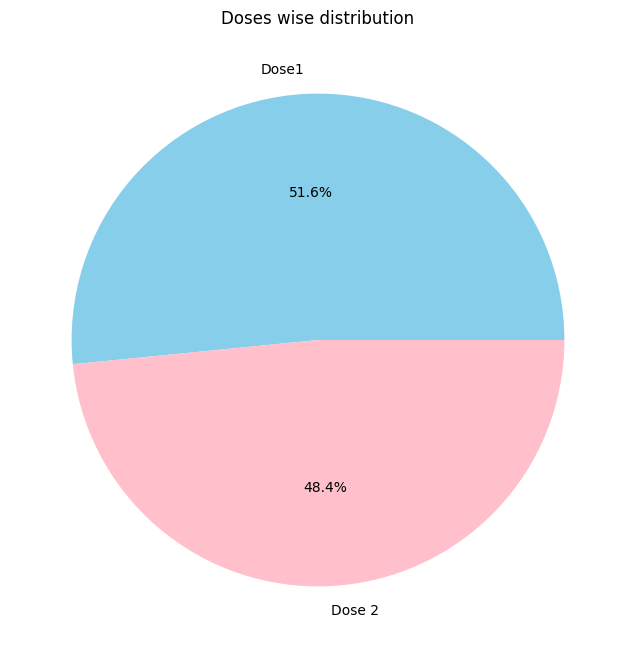

In [27]:
labels = ['Dose1', 'Dose 2']
sizes = [india['Dose1'].sum(), india['Dose 2'].sum()]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'pink'])
plt.title('Doses wise distribution')
plt.show()


Top 10 states with the most vaccinations


In [28]:
india.head(7)

,State/UTs,Total Vaccination Doses,Dose1,Dose 2,Dose 1 15-18,Dose 2 15-18,Dose 1 12-14,Dose 2 12-14,Precaution 18-59,Population
0,Andaman And Nicobar,991264,313284,320383,19208,18860,15124,14042,236936,399001
1,Andhra Pradesh,110957430,40645695,43555744,2535344,2527613,1523375,1495445,12054868,91702478
2,Arunachal Pradesh,1924584,861396,748505,59100,44869,40852,28445,81191,1711947
3,Assam,50335778,22550941,20575569,1262520,972402,999552,602283,2108179,35998752
4,Bihar,157293015,62956601,59160917,6240650,5348480,4288630,3403195,12022637,128500364
5,Chandigarh,2291937,1090035,921251,57708,43907,38210,26050,51034,1158040
6,Chhattisgarh,49167939,18956734,18537851,1234990,1053338,1076071,752571,5750424,32199722


In [30]:
# Display first few rows to understand the structure of the data
print("Data Preview:")
print(india.head())

Data Preview:
             State/UTs  Total Vaccination Doses     Dose1    Dose 2  \
0  Andaman And Nicobar                   991264    313284    320383   
1       Andhra Pradesh                110957430  40645695  43555744   
2    Arunachal Pradesh                  1924584    861396    748505   
3                Assam                 50335778  22550941  20575569   
4                Bihar                157293015  62956601  59160917   

   Dose 1 15-18  Dose 2 15-18  Dose 1 12-14  Dose 2 12-14  Precaution 18-59  \
0         19208         18860         15124         14042            236936   
1       2535344       2527613       1523375       1495445          12054868   
2         59100         44869         40852         28445             81191   
3       1262520        972402        999552        602283           2108179   
4       6240650       5348480       4288630       3403195          12022637   

   Population  
0      399001  
1    91702478  
2     1711947  
3    35998752  
4   

In [31]:
print("\nSummary Statistics:")
print(india.describe())


Summary Statistics:
       Total Vaccination Doses         Dose1        Dose 2  Dose 1 15-18  \
count             3.600000e+01  3.600000e+01  3.600000e+01  3.600000e+01   
mean              6.115204e+07  2.555900e+07  2.400569e+07  1.726729e+06   
std               7.945565e+07  3.235136e+07  3.065844e+07  2.643017e+06   
min               1.453130e+05  5.691400e+04  5.601900e+04  2.911000e+03   
25%               2.287468e+06  1.045788e+06  8.914968e+05  5.975550e+04   
50%               4.064265e+07  1.778092e+07  1.523439e+07  1.063244e+06   
75%               1.121485e+08  4.281551e+07  4.431351e+07  2.558446e+06   
max               3.920112e+08  1.540970e+08  1.478667e+08  1.419366e+07   

       Dose 2 15-18  Dose 1 12-14  Dose 2 12-14  Precaution 18-59  \
count  3.600000e+01  3.600000e+01  3.600000e+01      3.600000e+01   
mean   1.494555e+06  1.147220e+06  9.038605e+05      4.404951e+06   
std    2.410739e+06  1.674575e+06  1.451959e+06      7.040571e+06   
min    2.782000e+0

In [32]:
# Step 3: Checking for null values
print("\nMissing Values:")
print(india.isnull().sum())


Missing Values:
State/UTs                  0
Total Vaccination Doses    0
Dose1                      0
Dose 2                     0
Dose 1 15-18               0
Dose 2 15-18               0
Dose 1 12-14               0
Dose 2 12-14               0
Precaution 18-59           0
Population                 0
dtype: int64


In [ ]:
india.groupby

In [40]:
#Step 5: Aggregating the data by state
total_vaccinations_by_state = india.groupby('State/UTs')['Total Vaccination Doses'].sum().reset_index()
total_vaccinations_by_state = total_vaccinations_by_state.sort_values(by='Total Vaccination Doses', ascending=False)

print("\nTotal Vaccinations by State/UTs:")
print(total_vaccinations_by_state)


Total Vaccinations by State/UTs:
                                   State/UTs  Total Vaccination Doses
33                             Uttar Pradesh                392011174
20                               Maharashtra                177977996
4                                      Bihar                157293015
35                               West Bengal                156100370
19                            Madhya Pradesh                133940196
10                                   Gujarat                128105565
30                                Tamil Nadu                127533904
15                                 Karnataka                122152396
28                                 Rajasthan                115721511
1                             Andhra Pradesh                110957430
25                                    Odisha                 81545960
31                                 Telangana                 77627542
16                                    Kerala            

<ipython-input-41-8c825a8bc647>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Vaccination Doses', y='State/UTs', data=total_vaccinations_by_state, palette='viridis')


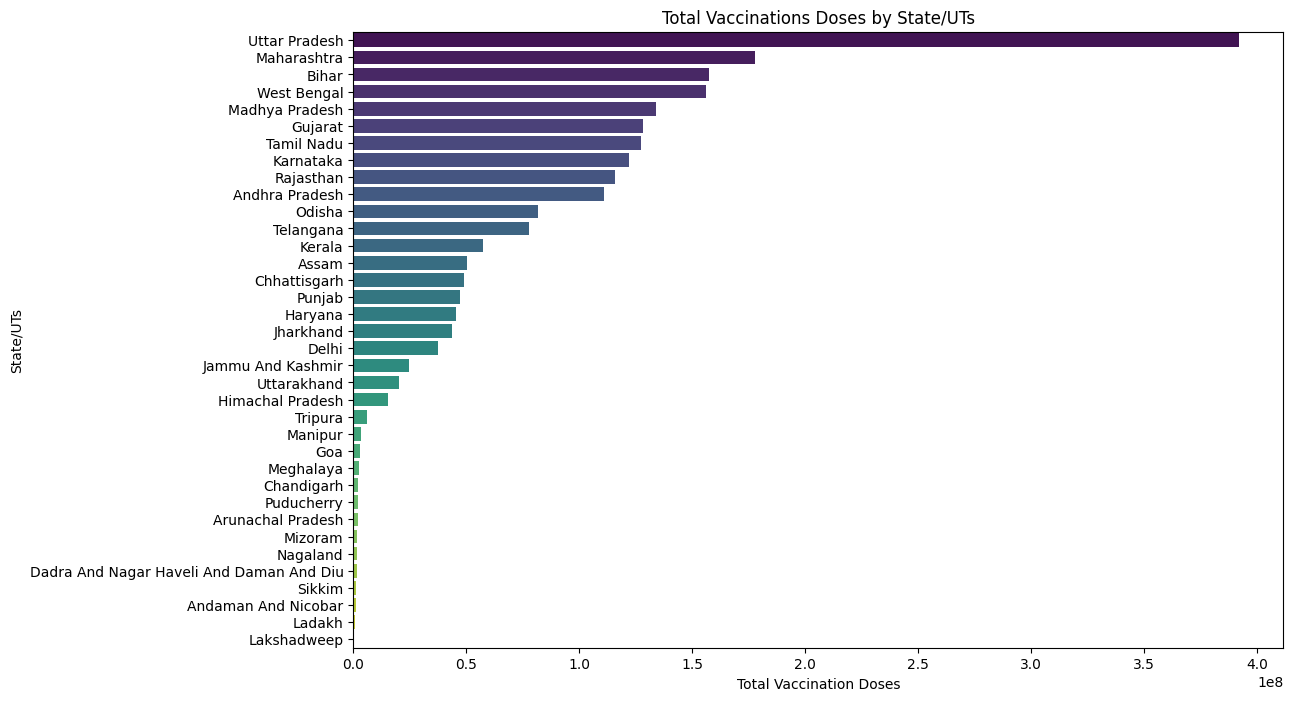

In [41]:
# Step 6: Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Vaccination Doses', y='State/UTs', data=total_vaccinations_by_state, palette='viridis')
plt.title('Total Vaccinations Doses by State/UTs')
plt.xlabel('Total Vaccination Doses')
plt.ylabel('State/UTs')
plt.show()

In [43]:
# Step 7: Analyzing daily trends (if date column exists)
if 'Date' in india.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    daily_vaccinations = data.groupby('Date')['Total Vaccination Doses'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Total Vaccination Doses', data=daily_vaccinations, marker='o')
    plt.title('Daily Vaccinations Trend')
    plt.xlabel('Date')
    plt.ylabel('Total Vaccination Doses')
    plt.xticks(rotation=45)
    plt.show()

In [38]:
# Step 8: Insights and Summary
print("\nInsights:")
print("1. The states with the highest number of total vaccinations are displayed in the bar plot.")
print("2. The daily trend plot shows how the vaccination numbers have varied over time.")
print("3. Further analysis could include age-wise or gender-wise breakdown if the data contains such columns.")



Insights:
1. The states with the highest number of total vaccinations are displayed in the bar plot.
2. The daily trend plot shows how the vaccination numbers have varied over time.
3. Further analysis could include age-wise or gender-wise breakdown if the data contains such columns.
